In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm, preprocessing 
from sklearn.tree import DecisionTreeRegressor

import cufflinks as cf
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from operator import add
init_notebook_mode(connected=True)
import random
import time
import os

In [122]:
data = pd.read_csv(r"D:\8th Semester B.Tech (IT)\4. Major Project\Diamond.csv")

In [123]:
data

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [124]:
data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  int64  
 2   color           53940 non-null  int64  
 3   clarity         53940 non-null  int64  
 4   height (in mm)  53940 non-null  float64
 5   table           53940 non-null  float64
 6   price (in USD)  53940 non-null  int64  
 7   length (in mm)  53940 non-null  float64
 8   width (in mm)   53940 non-null  float64
 9   depth (in mm)   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [126]:
data.isnull().sum()

carat             0
cut               0
color             0
clarity           0
height (in mm)    0
table             0
price (in USD)    0
length (in mm)    0
width (in mm)     0
depth (in mm)     0
dtype: int64

In [127]:
data.dtypes

carat             float64
cut                 int64
color               int64
clarity             int64
height (in mm)    float64
table             float64
price (in USD)      int64
length (in mm)    float64
width (in mm)     float64
depth (in mm)     float64
dtype: object

In [128]:
data.describe()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [129]:
numcols = data.select_dtypes(include = ['float64','int64']).columns.tolist()

C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_13060\4154727937.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_13060\4154727937.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_13060\4154727937.py:5: UserWarning:



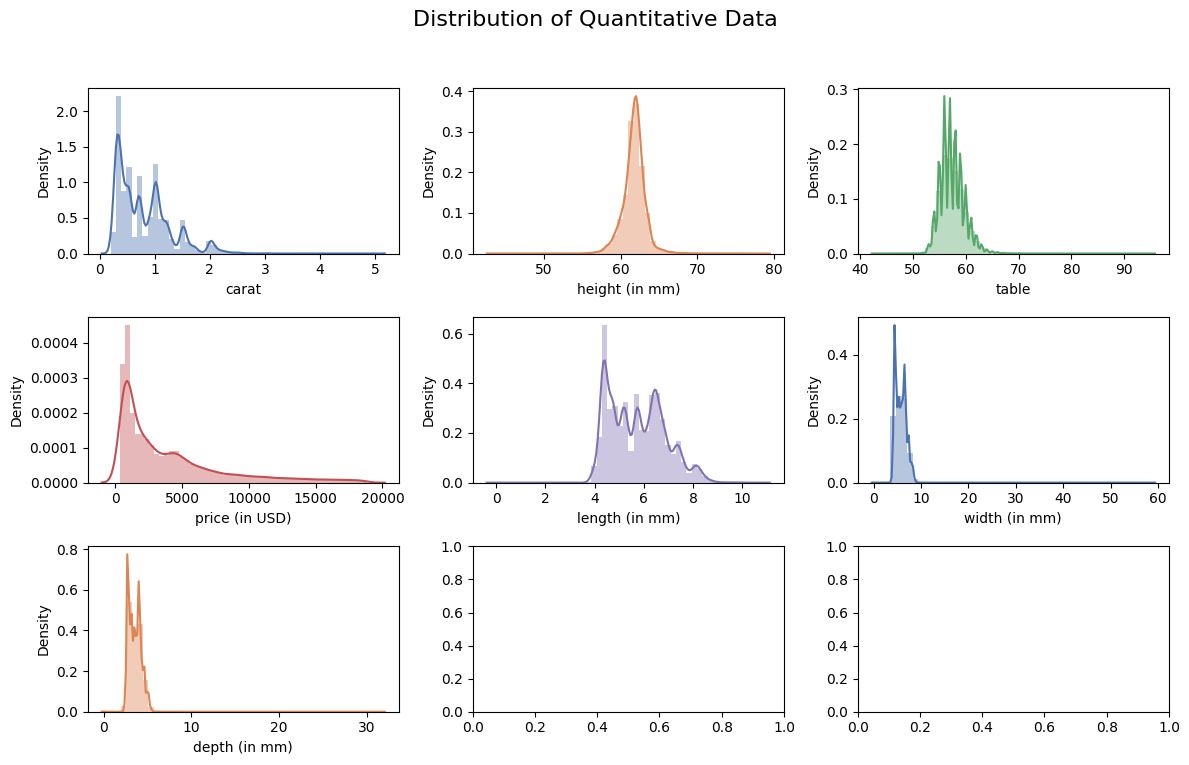

In [130]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.distplot(data["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.distplot(data["table"], color = colors[2], ax = axes[0,2])
sns.distplot(data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.distplot(data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.distplot(data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.distplot(data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

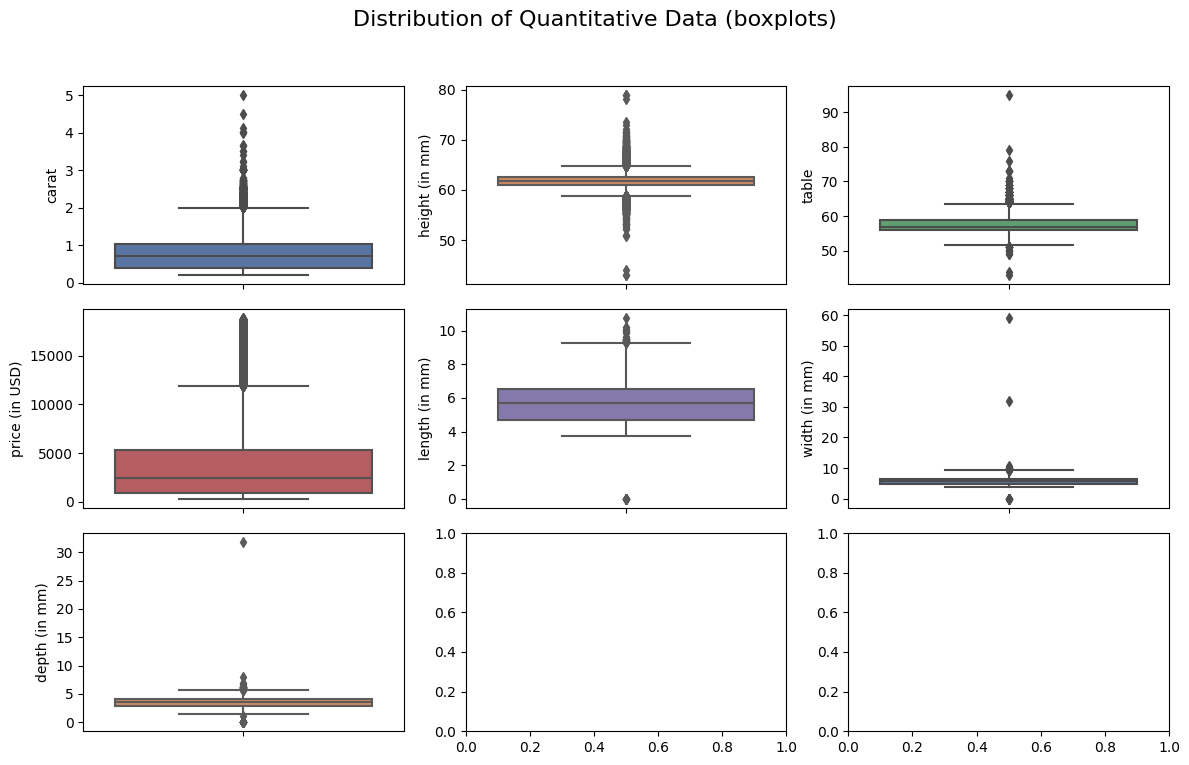

In [131]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.boxplot(y = data["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y = data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.boxplot(y = data["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y = data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.boxplot(y = data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.boxplot(y = data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.boxplot(y = data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data (boxplots)", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [132]:
zero_data = data[(data['length (in mm)'] == 0) | (data['width (in mm)'] == 0) | (data['depth (in mm)'] == 0)]

In [133]:
zero_data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
2207,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0


In [134]:
zero_data.shape

(20, 10)

In [135]:
data.drop(zero_data.index, inplace = True)

In [136]:
data.shape

(53920, 10)

In [137]:
X = data.drop(['price (in USD)'], axis=1)
y = data['price (in USD)']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
print("Total dataset size: {}".format(data.shape))
print("Training set size (80%): {}".format(X_train.shape))
print("Test set size (20%): {}".format(X_test.shape))

Total dataset size: (53920, 10)
Training set size (80%): (43136, 9)
Test set size (20%): (10784, 9)


In [141]:
def fit(x):
    par1=x
    reg=RandomForestRegressor(n_estimators=par1[0])
    reg.fit(X_train,y_train)
    global y_pred
    y_pred=reg.predict(X_train)
    result=metrics.r2_score(y_train,y_pred)  
    return result 

In [181]:
def fit1(x):
    par1=x
    reg1=RandomForestRegressor(n_estimators=par1[0])
    reg1.fit(X_train,y_train)
    global y_test_pred
    y_test_pred=reg1.predict(X_test)
    result1=metrics.r2_score(y_test,y_test_pred)  
    return result1 

In [142]:
def findgbest(lbest,fit):
    gbest=0
    loc=fit.index(max(fit))
    gbest=lbest[loc]
    return gbest,loc

In [143]:
def findnextvel(v,lbest,gbest,x):
    vnextvalue=0
    vnewtemp=[]
    c1=1.2
    c2=1.2
    r1=random.uniform(0,1)
    r2=random.uniform(0,1)
    for i in range(0,len(x)):
        vtemp=v[i]
        lbtemp=lbest[i]
        xtemp=x[i]
        vnext=[]
        for j in range(0,len(v[0])):
            vnextvalue=vtemp[j]+c1*r1*(lbtemp[j]-xtemp[j])+c2*r2*(gbest[j]-xtemp[j])
            vnext.append(vnextvalue)
            
        vnewtemp.insert(i,vnext)
    return vnewtemp

In [144]:
def findnextpos(x,vnext):
    nextpos1=[]
    for i in range(0,len(x)):
        nextposval=list(map(add, x[i], vnext[i]))
        
        nextpos=nextposval
        #print(nextpos)
       
        for k in range(0,len(nextpos)):
            if k==0:
                nextpos[k]=int(np.round(nextpos[k]))
                if nextpos[k] < 1 or nextpos[k] > 100:
                    pos1=random.randint(1,100)
                    nextpos[k]=pos1
            
        nextposval=nextpos            
        nextpos1.insert(i,nextposval)
        
    return nextpos1

In [145]:
def findlbest(x,nextpos):
    lbest=[]
    fit1=[]
    fit2=[]
    for i in range(0,len(x)):
        f1=fit(x[i])
        fit1.insert(i,f1)
        f2=fit(nextpos[i])
        fit2.insert(i,f2)
    for i in range(0,len(x)):
        if fit1[i]>fit2[i]:
            lbest.insert(i,x[i])
        else:
            lbest.insert(i,nextpos[i])
    return lbest

In [177]:
def update_x_nextpos(x,nextpos):
    nextpos=findlbest(x,nextpos)
    return nextpos

In [147]:
ipos=[]
velocity=[]
fitness=[]
lbest=[]
nextpos=[]
xprev=[]
accuracy=[]
gbestresult=[]
gbest=0
vnext=[]
lb=0
ub=10
gbest_loc_list=[]
fit_val=[]
fitnesses=[]
acc=[]

In [148]:
n=int(input("Enter the population size:"))

Enter the population size:10


In [149]:
#first initializing the position
for i in range(0,n):
      nest=random.randint(1,200)
      ipos.insert(i,[nest])

In [150]:
#first initializing the velocity
for i in range(0,n):
      r1=random.uniform(0,1)
      velocity.insert(i,[r1])

In [151]:
for i in range(0,n):
        f=fit(ipos[i])
        fitness.insert(i,f)

In [152]:
print(fitness)

[0.9972251151615058, 0.9974490925783377, 0.9974923468486172, 0.9973559557232801, 0.9975170215714505, 0.9974010725076717, 0.997531779169496, 0.9973888889703652, 0.9974697590387, 0.997465005677411]


In [218]:
fit_val=[]

In [219]:
fitnesses=[]

In [220]:
#first assigning the fitness
itr=1
while 1:
    #assigning the local best to each
    if itr==1: 
        lbest=ipos
    else:
        fitness=[]
        
        for i in range(0,n):
            f1=fit(nextpos[i])
            fitness.insert(i,f1)  
       
        lbest=findlbest(xprev,nextpos)
    
    fitnesses.insert(itr,sum(fitness))
    
    #finding the gbest
    gbest,loc=findgbest(lbest,fitness)
    gbest_loc_list.append(loc)
    
    #finding the next velocity
    vnext=findnextvel(velocity,lbest,gbest,ipos)
      
    #finding the next position
    nextpos=findnextpos(ipos,vnext)
    
    #keep best from x and nextpos 
    nextpos=update_x_nextpos(ipos,nextpos)
    
    #update x
    xprev=ipos
    ipos=nextpos
    velocity=vnext
    itr+=1
    fit_val.append(fitnesses)
    gbestresult.append(gbest)
    if itr>100 :
        break

In [38]:
display(fitnesses)

[9.97123705942182,
 9.97383531600433,
 9.97397652404285,
 9.97420256868209,
 9.9741270303209,
 9.97430792110194,
 9.97425796877777,
 9.97424919253202,
 9.97424906072663,
 9.97414773727461,
 9.97424338241196,
 9.97438679120469,
 9.97420296410027,
 9.9743659602428,
 9.97433173125707,
 9.97422044898831,
 9.97430650107405,
 9.97429361815248,
 9.97433375172753,
 9.97428280185426,
 9.97415932150069,
 9.9742348527655,
 9.97430365108105,
 9.97431922747522,
 9.97438614107013,
 9.97440879183146,
 9.97443006084979,
 9.97433596342087,
 9.97439951825605,
 9.97440438191415,
 9.974358338348,
 9.97440001106396,
 9.97443730160882,
 9.97434942837113,
 9.97440886149149,
 9.97449649563851,
 9.97450469386878,
 9.97446922139535,
 9.97448918056561,
 9.9745031087831,
 9.97449564090509,
 9.97453437613219,
 9.97452176440911,
 9.97450750100007,
 9.97450120846014,
 9.97449744896595,
 9.97455648512445,
 9.97460857287113,
 9.97457212107899,
 9.97461678769301,
 9.97459626950246,
 9.97461422377173,
 9.9746836039503,


In [39]:
epoch = [i+1 for i in range(100)]

In [40]:
print (epoch)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [41]:
df3=pd.DataFrame({'epochs':epoch, 'Fitness':fitnesses})

In [42]:
df3

,epochs,Fitness
0,1,9.971237
1,2,9.973835
2,3,9.973977
3,4,9.974203
4,5,9.974127
...,...,...
95,96,9.974747
96,97,9.974747
97,98,9.974747
98,99,9.974747


Text(0.5, 1.0, 'epochs vs Fitness')

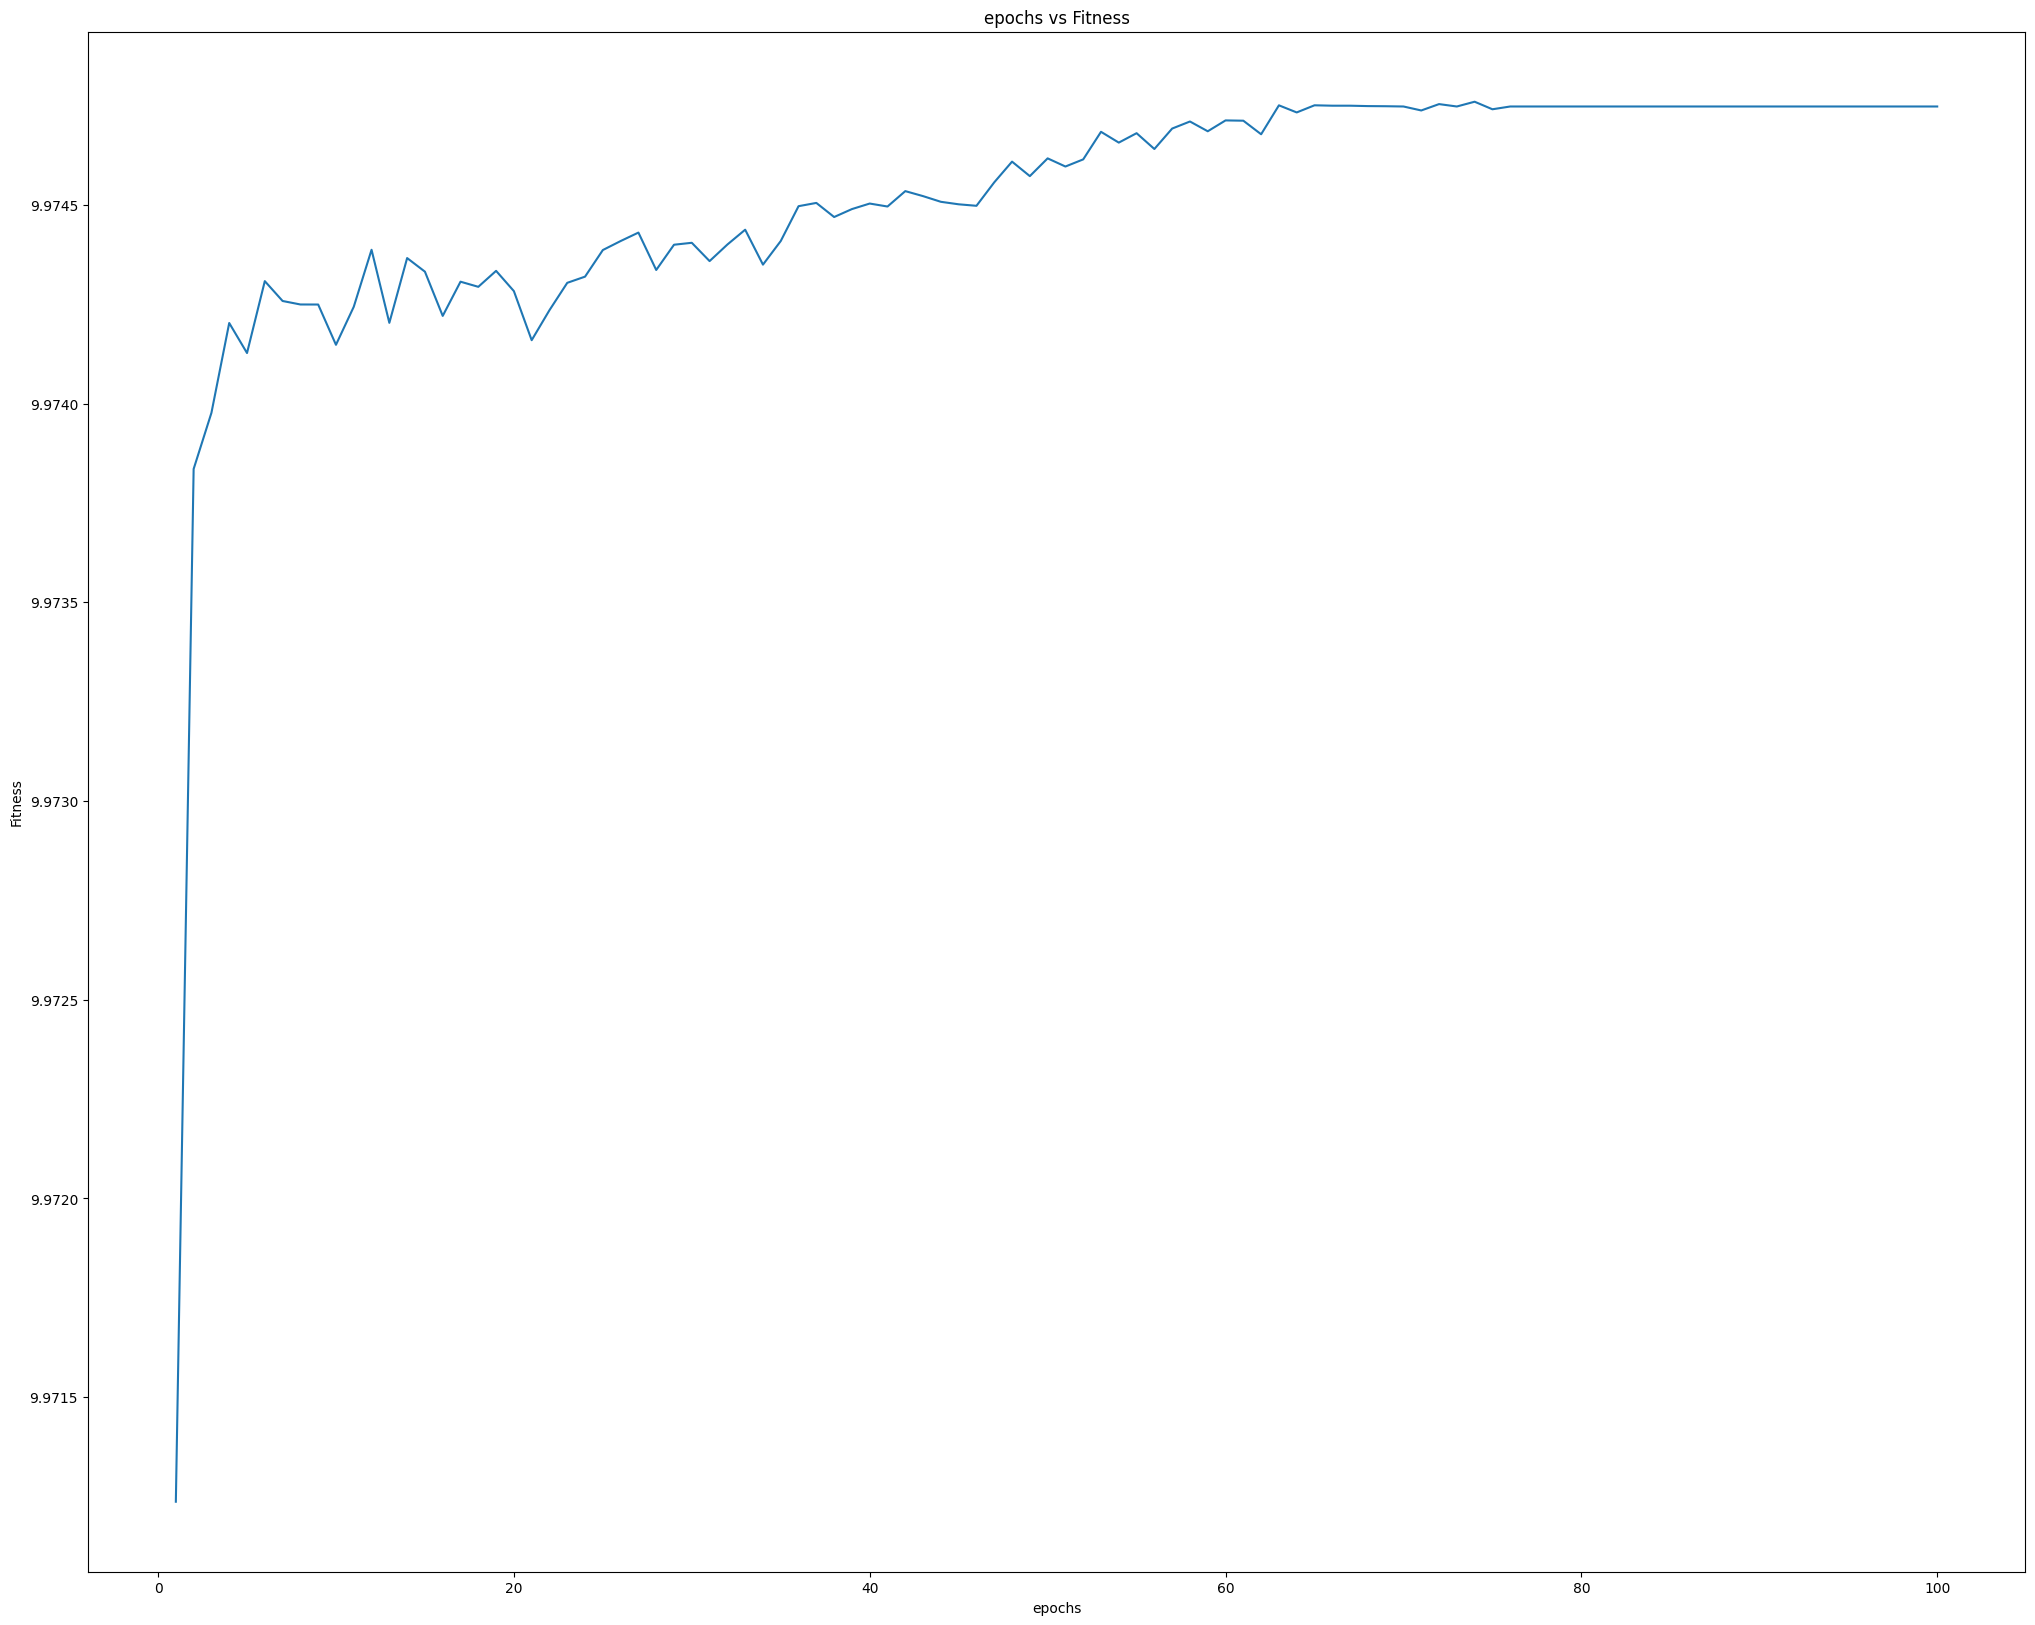

In [43]:
f = plt.figure(figsize=(20,25))
f.set_figwidth(25)
f.set_figheight(20)
plt.plot(epoch,fitnesses)
plt.xlabel("epochs")
plt.ylabel("Fitness")
plt.title("epochs vs Fitness")

In [44]:
file3="epochs vs fitness.xlsx"

In [45]:
df3.to_excel(file3)

In [153]:
acc=[]

In [154]:
#first assigning the fitness
itr=1
while 1:
    #assigning the local best to each
    if itr==1: 
        lbest=ipos
    else:
        fitness=[]
        
        for i in range(0,n):
            f1=fit(nextpos[i])
            fitness.insert(i,f1)  
       
        lbest=findlbest(xprev,nextpos)
    
    acc.insert(itr,max(fitness))
    
    #finding the gbest
    gbest,loc=findgbest(lbest,fitness)
    gbest_loc_list.append(loc)
    
    #finding the next velocity
    vnext=findnextvel(velocity,lbest,gbest,ipos)
      
    #finding the next position
    nextpos=findnextpos(ipos,vnext)
    
    #keep best from x and nextpos 
    nextpos=update_x_nextpos(ipos,nextpos)
    
    #update x
    xprev=ipos
    ipos=nextpos
    velocity=vnext
    itr+=1
    accuracy.append(acc)
    gbestresult.append(gbest)
    if itr>200 :
        break

In [46]:
display(acc)

[0.997531779169496,
 0.9975323202230995,
 0.9975251426273232,
 0.9975226097913465,
 0.9975068002550018,
 0.9975289493848782,
 0.9975358439942826,
 0.9975284926009091,
 0.997538406952169,
 0.9975113910333698,
 0.9975333310707695,
 0.9975272450147443,
 0.9975321519045676,
 0.9975365220346062,
 0.9975309508116675,
 0.9975287881388039,
 0.9975392650222512,
 0.9975357201388538,
 0.9975301340082352,
 0.9975313489904662,
 0.9975285710573268,
 0.9975208734231608,
 0.9975281404130298,
 0.9975168035484235,
 0.9975219167481854,
 0.9975240471749836,
 0.9975270116304064,
 0.9975409036649838,
 0.9975133612511132,
 0.9975401429741785,
 0.9975182346436506,
 0.9975370229862485,
 0.9975210066072855,
 0.9975229418235034,
 0.9975084488053151,
 0.997536415319934,
 0.9975187121509609,
 0.9975169974869647,
 0.9975106827298331,
 0.9975340335043926,
 0.9975389661570715,
 0.9975206197170223,
 0.9975296294812329,
 0.997542180238349,
 0.9975427761815272,
 0.9975089287640191,
 0.997528374852552,
 0.997517797605299

In [156]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9973823167644136
Adjusted R^2: 0.997381770477971
MAE: 100.49429050916414
MSE: 41972.95203364745
RMSE: 204.87301441050613


In [47]:
epochs = [i+1 for i in range(200)]

In [48]:
print (epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [49]:
df=pd.DataFrame({'epochs':epochs, 'Accuracy':acc})

In [50]:
df

,epochs,Accuracy
0,1,0.997532
1,2,0.997532
2,3,0.997525
3,4,0.997523
4,5,0.997507
...,...,...
195,196,0.997532
196,197,0.997525
197,198,0.997523
198,199,0.997513


Text(0.5, 1.0, 'epochs vs Accuracy')

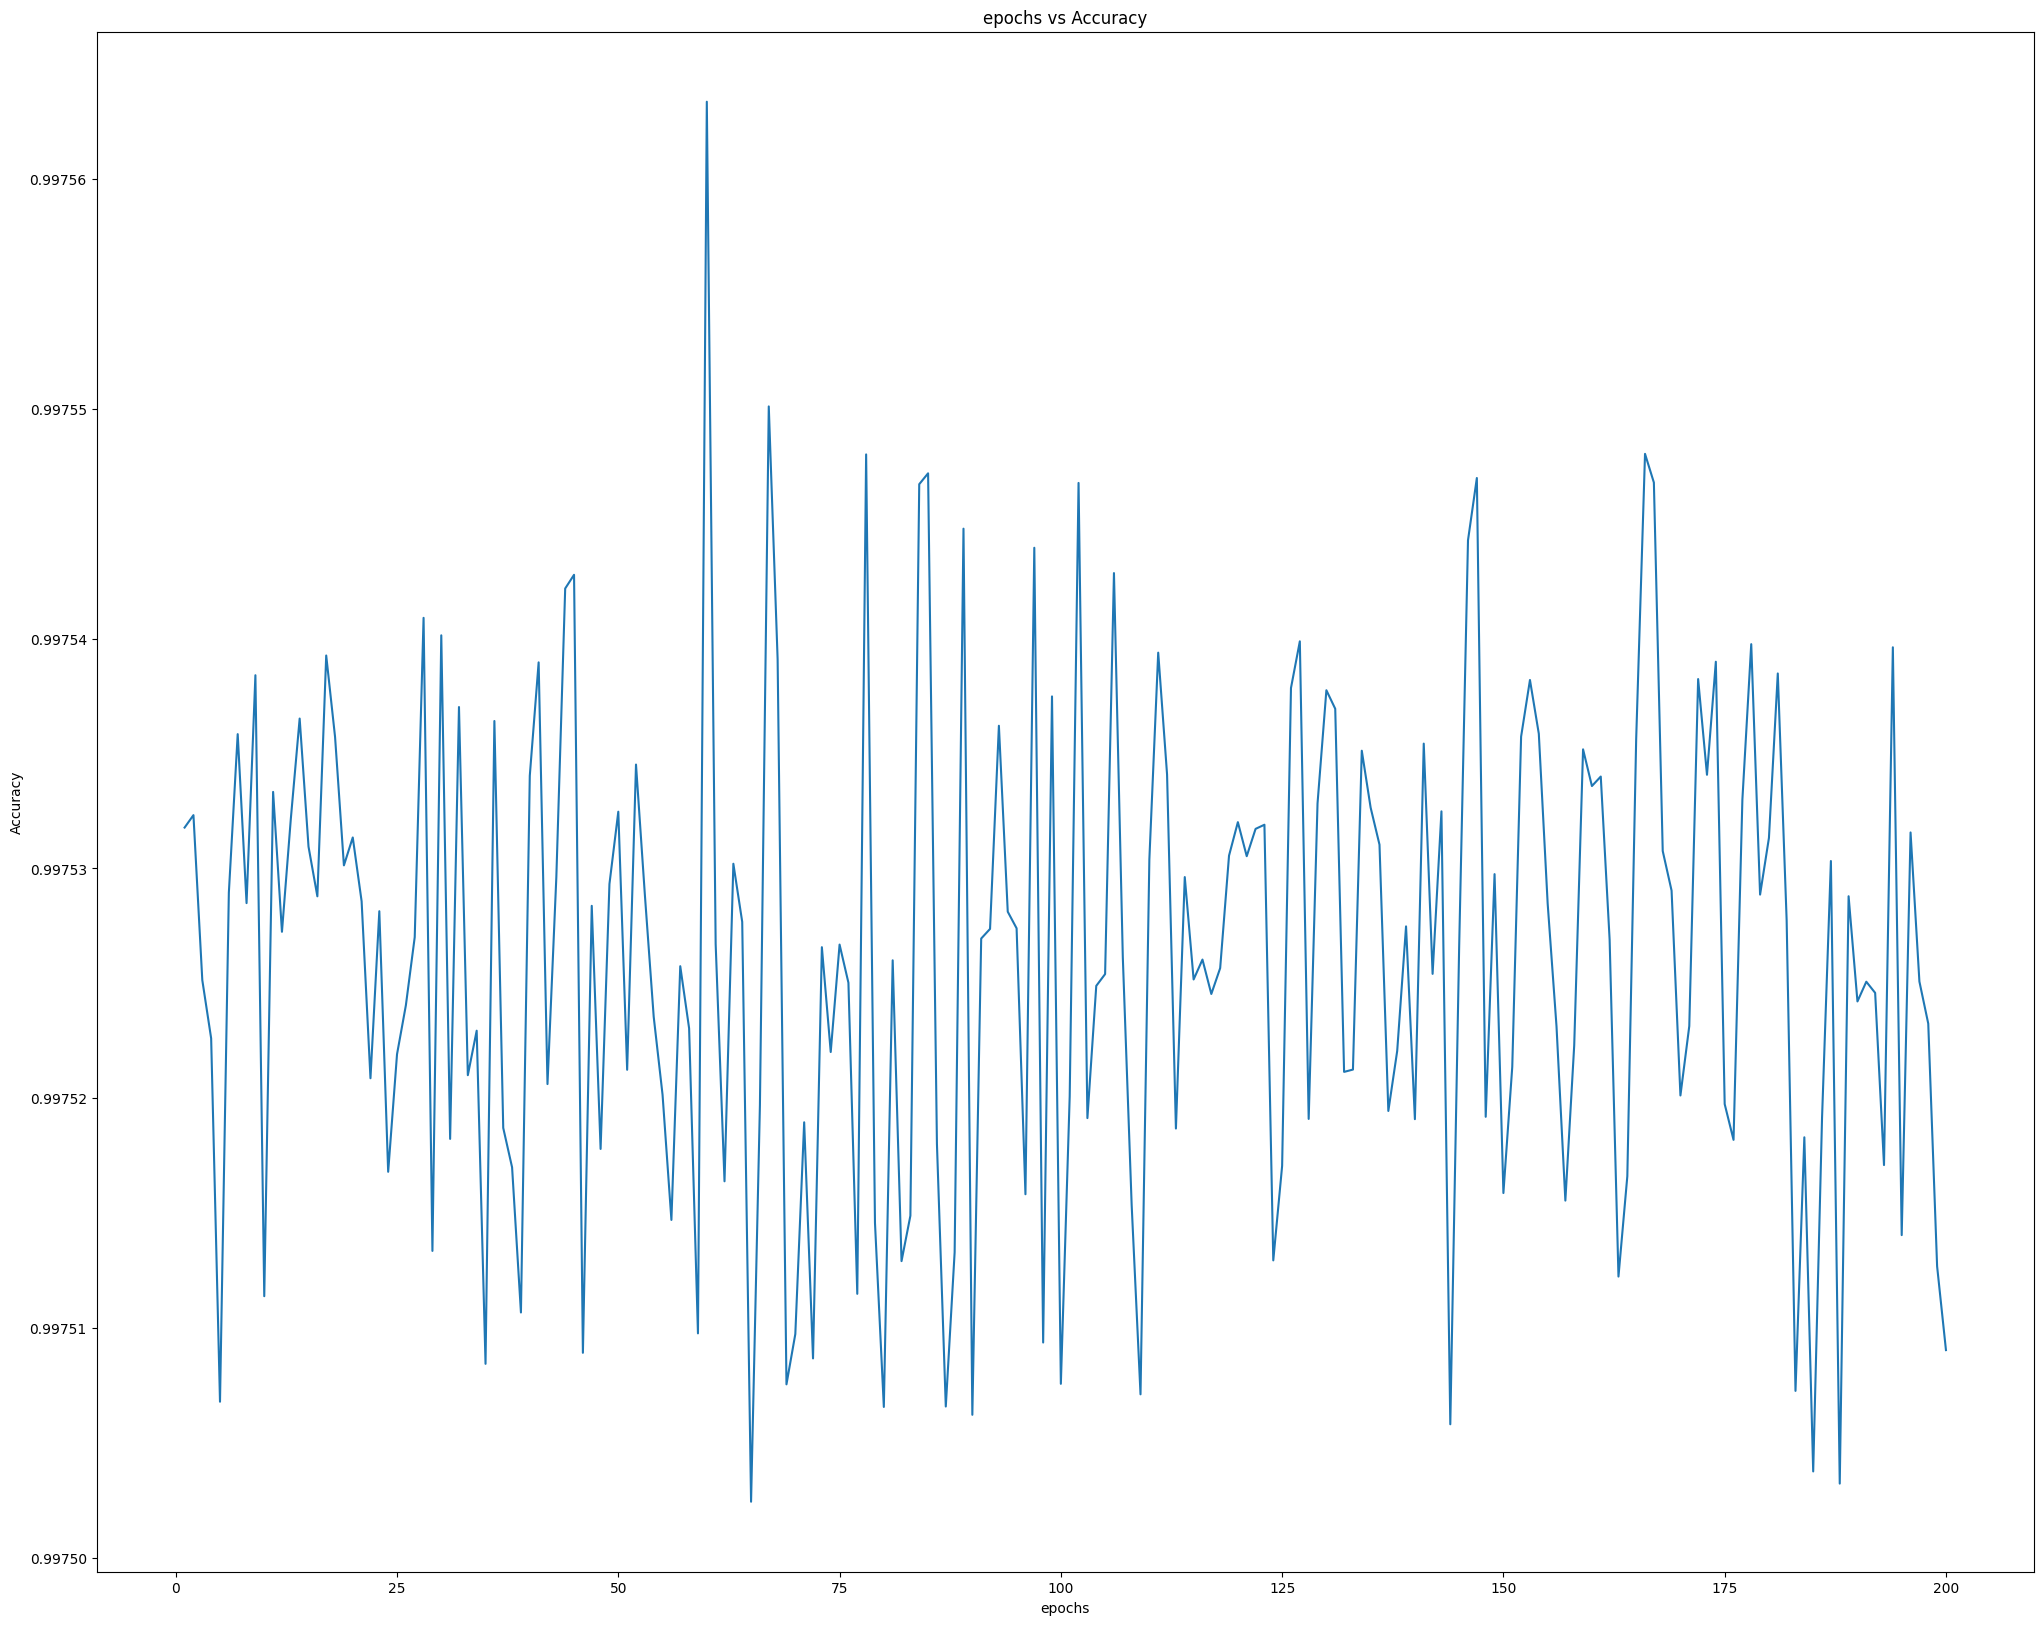

In [51]:
f = plt.figure(figsize=(20,25))
f.set_figwidth(25)
f.set_figheight(20)
plt.plot(epochs,acc)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("epochs vs Accuracy")

In [52]:
file="epochs vs accuracy.xlsx"

In [53]:
df.to_excel(file)

In [184]:
#find the test accuracy
itr=90
fitness=[]        
for i in range(0,n):
    f1=fit1(nextpos[i])
    fitness.insert(i,f1)  
    
test_acc=max(fitness)
print(test_acc)

0.9811683147354375


In [185]:
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9809447466912986
Adjusted R^2: 0.9809288289931569
MAE: 264.1329279892904
MSE: 292490.1202376859
RMSE: 540.8235573989782


In [186]:
df2=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_test_pred})

In [187]:
df2

,Actual Price,Predicted Price
12417,5237,5055.781250
53286,552,545.177083
27845,651,662.510417
25413,14139,13939.416667
32246,789,791.666667
...,...,...
23293,11322,10359.302083
35957,475,723.135417
52695,2553,3064.187500
17131,6837,7105.114583


In [188]:
file2="result_pso.xlsx"

In [189]:
df2.to_excel(file2)

In [190]:
I=[]
for i in range (1,10785):
    I.insert(i,i)

In [191]:
display(I)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [192]:
I1=y_test.tolist()

In [193]:
I2=y_test_pred.tolist()

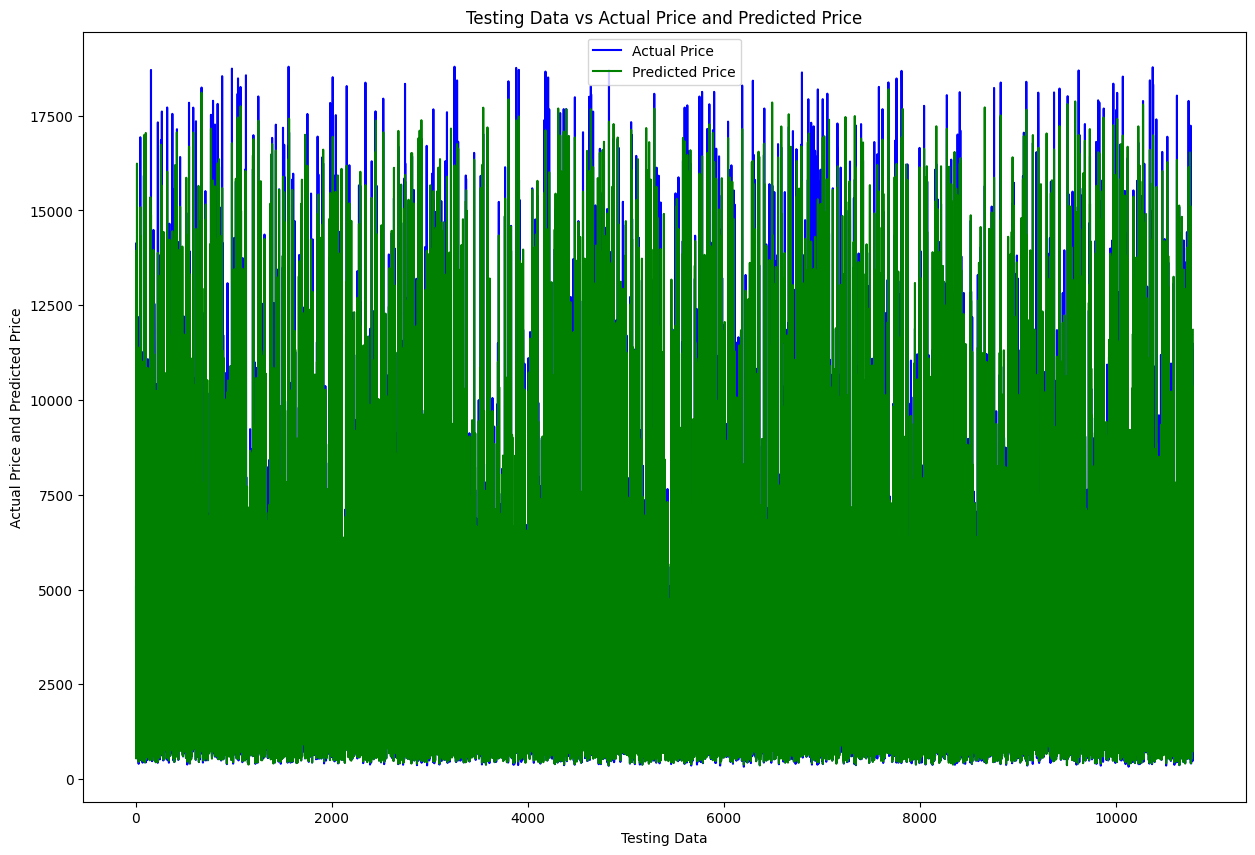

In [194]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I, I1, 'b', label='Actual Price')
plt.plot(I, I2, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [195]:
I3=I[0:1000]

In [196]:
I4=I1[0:1000]

In [197]:
I5=I2[0:1000]

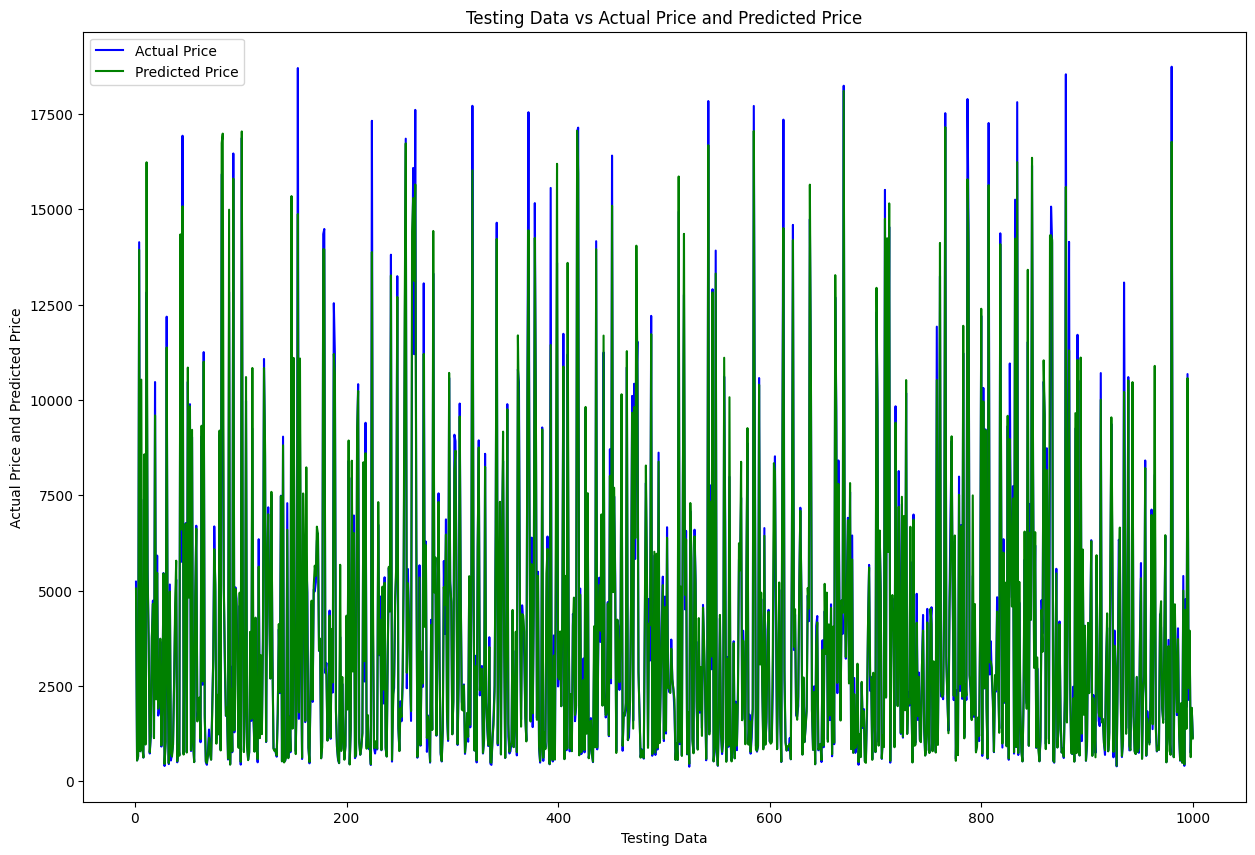

In [198]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I3, I4, 'b', label='Actual Price')
plt.plot(I3, I5, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [199]:
I6=I[0:100]

In [200]:
I7=I1[0:100]

In [201]:
I8=I2[0:100]

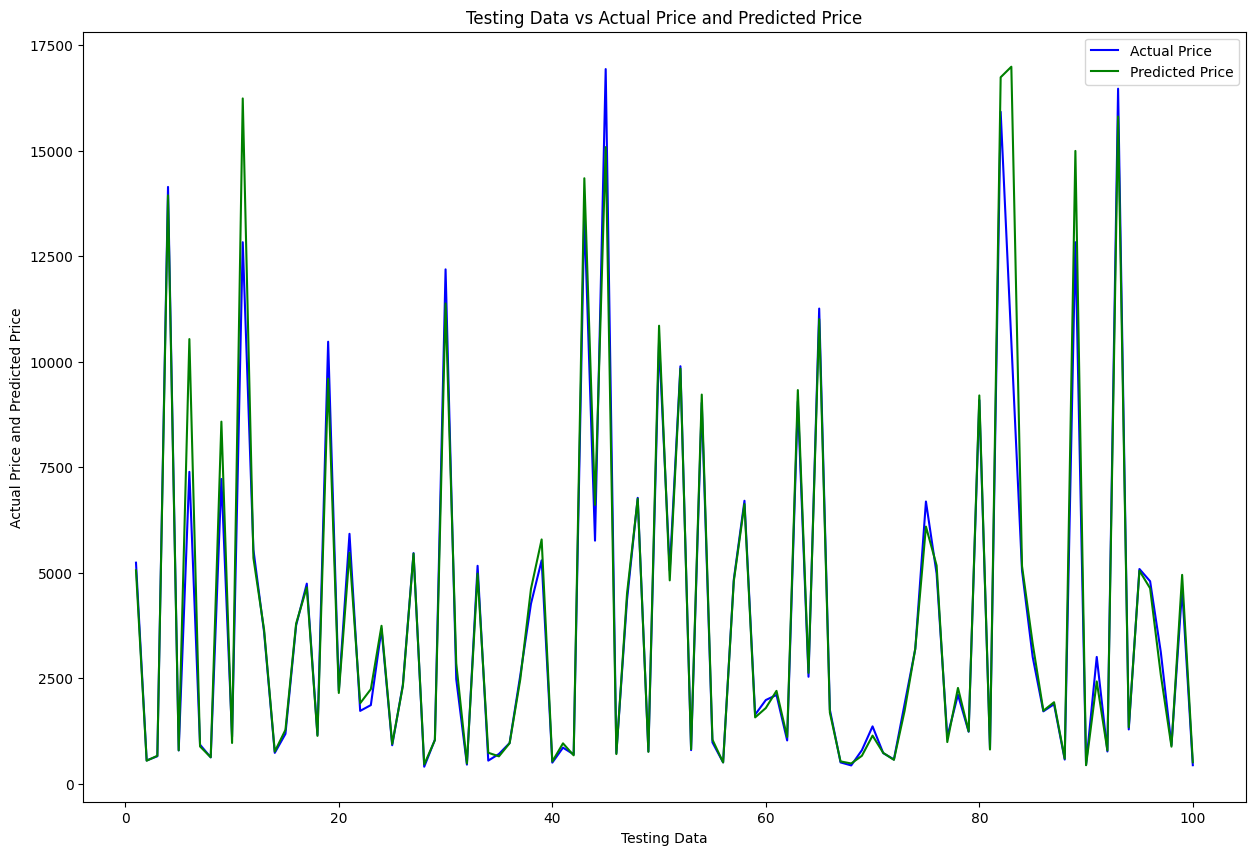

In [202]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I6, I7,'b', label='Actual Price')
plt.plot(I6, I8,'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [203]:
df2['Difference'] = None

In [204]:
df2['Percentage of Difference'] = None

In [205]:
df2

,Actual Price,Predicted Price,Difference,Percentage of Difference
12417,5237,5055.781250,None,None
53286,552,545.177083,None,None
27845,651,662.510417,None,None
25413,14139,13939.416667,None,None
32246,789,791.666667,None,None
...,...,...,...,...
23293,11322,10359.302083,None,None
35957,475,723.135417,None,None
52695,2553,3064.187500,None,None
17131,6837,7105.114583,None,None


In [206]:
index_actual=df2.columns.get_loc('Actual Price')
index_predicted=df2.columns.get_loc('Predicted Price')
index_difference=df2.columns.get_loc('Difference')
index_percentage=df2.columns.get_loc('Percentage of Difference')
 
print(index_actual,index_predicted,index_difference,index_percentage)

0 1 2 3


In [207]:
for row in range(0, len(df2)):
    df2.iat[row, index_difference] = abs(df2.iat[row, index_actual] - df2.iat[row, index_predicted])
    df2.iat[row, index_percentage] = df2.iat[row, index_difference]/df2.iat[row, index_actual]*100

In [208]:
df2

,Actual Price,Predicted Price,Difference,Percentage of Difference
12417,5237,5055.781250,181.21875,3.460354
53286,552,545.177083,6.822917,1.236036
27845,651,662.510417,11.510417,1.768113
25413,14139,13939.416667,199.583333,1.41158
32246,789,791.666667,2.666667,0.337981
...,...,...,...,...
23293,11322,10359.302083,962.697917,8.502896
35957,475,723.135417,248.135417,52.239035
52695,2553,3064.187500,511.1875,20.023012
17131,6837,7105.114583,268.114583,3.921524


In [209]:
file2="result_pso.xlsx"

In [210]:
df2.to_excel(file2)